In [62]:
import pandas as pd
import numpy as np

In [63]:
PATH_DATASET = '../data/penguins.csv'
df = pd.read_csv(PATH_DATASET)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

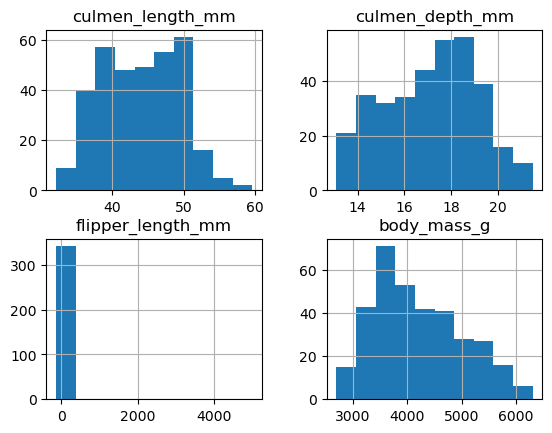

In [64]:
df.hist()

array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

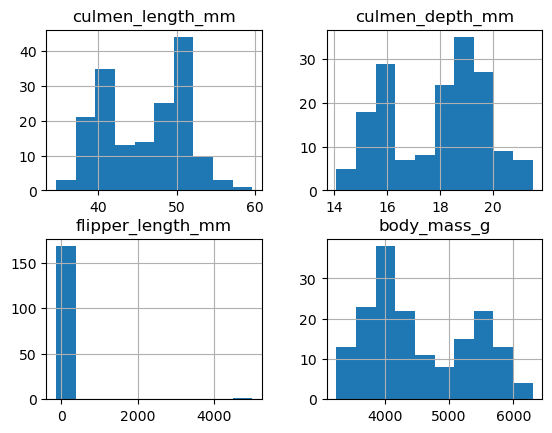

In [65]:
df[df.sex == "MALE"].hist()

array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

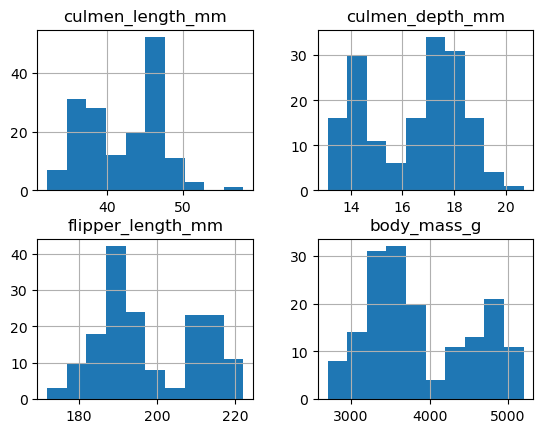

In [66]:
df[df.sex == 'FEMALE'].hist()

In [67]:
df[df.sex == 'FEMALE'].select_dtypes(include=['number']).corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.426380,0.571474,0.581295
culmen_depth_mm,-0.426380,1.000000,-0.794167,-0.747770
flipper_length_mm,0.571474,-0.794167,1.000000,0.884825
body_mass_g,0.581295,-0.747770,0.884825,1.000000


<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

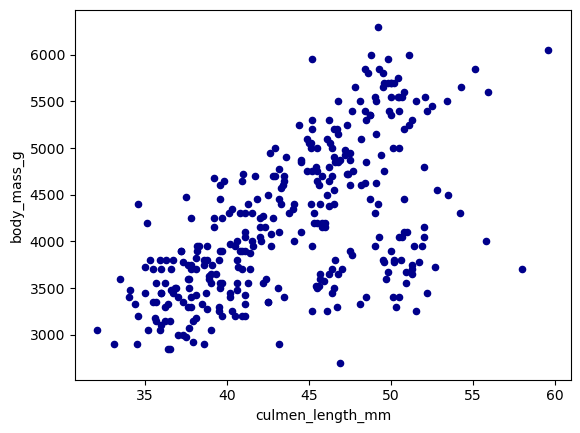

In [68]:
df.plot.scatter(x='culmen_length_mm', y='body_mass_g', c='DarkBlue')

In [69]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [70]:
df = df[(df.flipper_length_mm > 0) & (df.flipper_length_mm < 5000)]

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

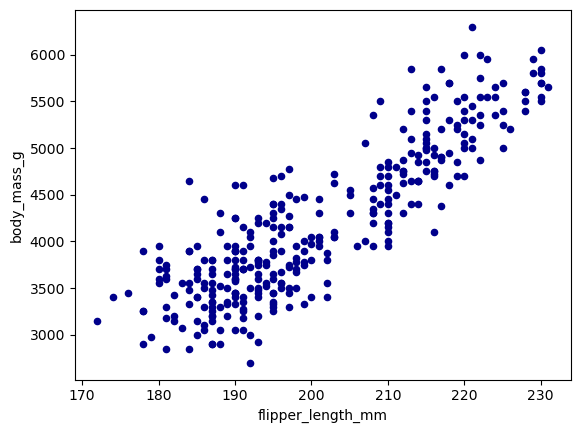

In [71]:
df.plot.scatter(x='flipper_length_mm', y='body_mass_g', c='DarkBlue')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   340 non-null    float64
 1   culmen_depth_mm    340 non-null    float64
 2   flipper_length_mm  340 non-null    float64
 3   body_mass_g        340 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.9+ KB


In [73]:
# Clustering with k means
df.sex = df.sex.map({'MALE': 0, 'FEMALE': 1})

df = df.dropna()

C:\Users\ardik\AppData\Local\Temp\ipykernel_12132\674962086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex = df.sex.map({'MALE': 0, 'FEMALE': 1})


c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ardik\AppData\Local\Temp\ipykernel_12132\1994951054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = model.predict(df)


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

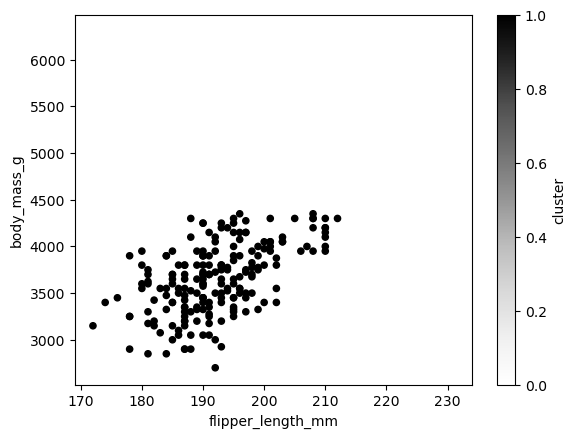

In [74]:
# encode male female
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(df)

df['cluster'] = model.predict(df)
df.plot.scatter(x="flipper_length_mm", y="body_mass_g", c="cluster")

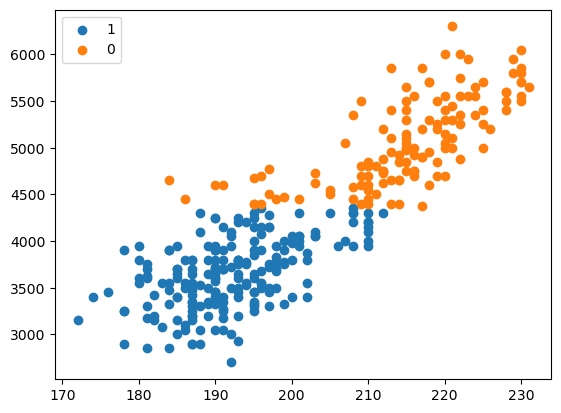

In [75]:
# plot cluster with color

import matplotlib.pyplot as plt

for cluster in df.cluster.unique():
    plt.scatter(df[df.cluster == cluster].flipper_length_mm, df[df.cluster == cluster].body_mass_g, label=cluster)
plt.legend()

c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-pa

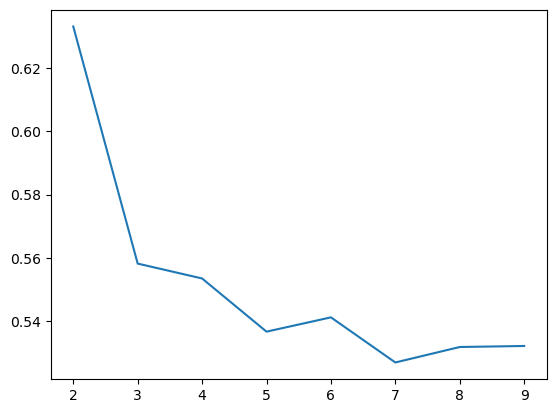

In [76]:
# elbow method to determine the k

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(df)
    scores.append(silhouette_score(df, model.predict(df)))

plt.plot(range(2, 10), scores)

c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ardik\Anaconda3\envs\ExamMachineLearning\Lib\site-pa

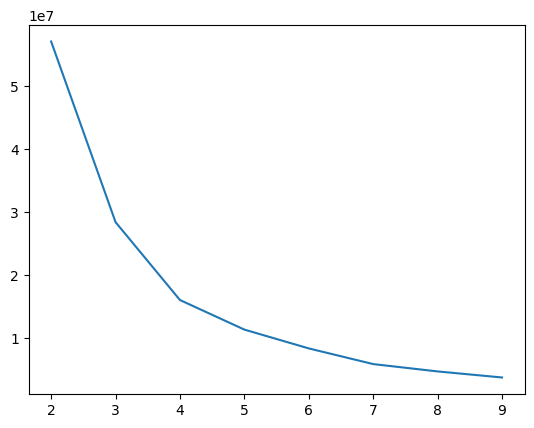

In [77]:
# wcss

scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(df)
    scores.append(model.inertia_)

plt.plot(range(2, 10), scores)

In [78]:
# computer delta gradient for each point


def gradient(x1, x2, y1, y2):
  return (y2 - y1) / (x2 - x1)

gradients = []
for i in range(len(scores)-1):
  gradients.append(gradient(i, i+1, scores[i], scores[i+1]))

In [79]:
import numpy as np

gradients = np.array(gradients)
gradients = np.abs(gradients)
gradients.argmax()

np.int64(0)

In [80]:
gradients

array([28709444.18972528, 12375894.91517274,  4698345.27974466,
        2990051.59985924,  2489720.85527149,  1166719.58835843,
         960740.23151293])

In [81]:
# clusetering using dbscan

from sklearn.cluster import DBSCAN

model_DBSCAN = DBSCAN(eps=0.5, min_samples=5)
model_DBSCAN.fit(df)

df["cluster"] = model_DBSCAN.fit_predict(df)

In [82]:
df_scaled = (df-df.mean())/df.std()
model_DBSCAN.fit_predict(df_scaled)

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
silhouette_score(df_scaled, model_DBSCAN.fit_predict(df_scaled))

ValueError: Input X contains NaN.
DBSCAN does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values